In [1]:
import pandas as pd
import pathlib

In [2]:

"""
path_results = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/results")

for path in path_results.glob("*.parquet"):
    df = pd.read_parquet(path)
    
    # print number of not "NOT_ENOUGH_INFO" 
    df = df[df["label"] != "NOT_ENOUGH_INFO"]
    # print number of not "NOT_ENOUGH_INFO"åååå
    print(path.stem, len(df))
    
    # keep the df with the maximum number of not "NOT_ENOUGH_INFO"
    if "df_max" not in locals():
        df_max = df
    else:
        if len(df) > len(df_max):
            df_max = df
            path_max = path
    # print number of not "NOT_ENOUGH_INFO"
df_max = pd.read_parquet(path_max)
print(f"the max is {path_max.stem} with {len(df_max)}")
"""

'\npath_results = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/results")\n\nfor path in path_results.glob("*.parquet"):\n    df = pd.read_parquet(path)\n\n    # print number of not "NOT_ENOUGH_INFO" \n    df = df[df["label"] != "NOT_ENOUGH_INFO"]\n    # print number of not "NOT_ENOUGH_INFO"åååå\n    print(path.stem, len(df))\n\n    # keep the df with the maximum number of not "NOT_ENOUGH_INFO"\n    if "df_max" not in locals():\n        df_max = df\n    else:\n        if len(df) > len(df_max):\n            df_max = df\n            path_max = path\n    # print number of not "NOT_ENOUGH_INFO"\ndf_max = pd.read_parquet(path_max)\nprint(f"the max is {path_max.stem} with {len(df_max)}")\n'

In [3]:
df_max = pd.read_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/results/mind_results_from_model_25k_qwen:32b_upt_prompt_evidence_1000el_qwen3:32b_for_answer.parquet")
# remove duplicates in df_max that have the same source_chunk and target_chunk
df_max = df_max.drop_duplicates(subset=["source_chunk", "target_chunk"])
df_max[df_max["label"] != "NOT_ENOUGH_INFO"]

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id
470,2,Can extreme weather conditions lead to famine ...,"The persistently cold, wet weather caused grea...","Famine In France, the Hundred Years' War, crop...","Yes, persistently cold and wet weather has his...","YES, extreme weather conditions can lead to fa...",NO_ DISCREPANCY,Both answers agree that extreme weather condit...,5-2,2nZ0kpYBqhjVS0zzqMEo_44
471,2,Can extreme weather conditions lead to famine ...,"The persistently cold, wet weather caused grea...",Societal collapse While it is difficult to say...,"Yes, persistently cold and wet weather has his...","YES, extreme weather conditions can lead to fa...",NO_ DISCREPANCY,Both answers agree that extreme weather condit...,5-2,VIGHkpYBqhjVS0zzou5I_5
473,2,Can extreme weather conditions lead to famine ...,"The persistently cold, wet weather caused grea...",Nuclear famine They cite the example of the Mo...,"Yes, persistently cold and wet weather has his...","YES, extreme weather conditions can lead to fa...",NO_ DISCREPANCY,Both answers agree that extreme weather condit...,5-2,eMO_kpYBqhjVS0zzXlno_10
474,2,Can extreme weather conditions lead to famine ...,"The persistently cold, wet weather caused grea...",The General Crisis === Climate change === The ...,"Yes, persistently cold and wet weather has his...","YES, extreme weather conditions can lead to fa...",NO_ DISCREPANCY,Both answers agree that extreme weather condit...,5-2,e5KYkpYBqhjVS0zzK_uE_3
477,2,Can extreme weather conditions lead to famine ...,"The persistently cold, wet weather caused grea...",Famine thumbrightFamine-affected areas in the ...,"Yes, persistently cold and wet weather has his...","YES, extreme weather conditions can lead to fa...",NO_ DISCREPANCY,Both answers agree that extreme weather condit...,5-2,2nZ0kpYBqhjVS0zzqMEo_19
...,...,...,...,...,...,...,...,...,...,...
24091,21,Has there been a correlation between past expl...,The concentration of carbon dioxide in the atm...,Hirnantian glaciation == Possible causes == ==...,"Yes, historical data shows that carbon dioxide...","NO, the passage does not support a correlation...",CONTRADICTION,The two answers directly contradict each other...,376-0,T4CGkpYBqhjVS0zzIK8b_4
24100,21,Has there ever been a time in the past when hi...,Combustion of fossil fuels and deforestation h...,Carbon dioxide in Earth's atmosphere These inc...,"No, the evidence indicates that current carbon...","YES, higher carbon dioxide levels have coincid...",CONTRADICTION,The answers present conflicting information ab...,376-1,GY6UkpYBqhjVS0zzcHFb_17
24561,23,Is contemporary global warming being assessed ...,The IPCC has adopted the baseline reference pe...,IPCC Fourth Assessment Report less than 0.0006...,I cannot answer given the context.,"YES, contemporary global warming is being asse...",NO_ DISCREPANCY,"ANSWER_1 does not provide any information, whi...",157-0,UoOJkpYBqhjVS0zz39tE_3
24569,23,Is contemporary global warming being assessed ...,The IPCC has adopted the baseline reference pe...,8.2-kiloyear event The cooling of the 8.2-kilo...,I cannot answer given the context.,"YES, contemporary global warming is being asse...",NO_ DISCREPANCY,"ANSWER_1 does not provide any information, whi...",157-0,lpCWkpYBqhjVS0zzYMts_3


In [4]:
print(df_max.label.unique())
values_mapping = {
    'NO_ DISCREPANCY': 'NO_DISCREPANCY',
    'CULTURAL_ DISCREPANCY': 'CULTURAL_DISCREPANCY',
    'TYPE: NOT_ENOUGH_INFO': 'NOT_ENOUGH_INFO',
    'TYPE: NO_': 'NO_DISCREPANCY',
    'TYPE: CONTRADICTIO': 'CONTRADICTION',
    'DISCREPANCY_ TYPE: NOT_ENOUGH_INFO': 'NOT_ENOUGH_INFO',
    'TYPE: CULTURAL_': 'CULTURAL_DISCREPANCY',
}
# replace the values in the label column
df_max['label'] = df_max['label'].replace(values_mapping)
df_max = df_max[df_max["label"] != ""]
df_max.label.unique()

['NOT_ENOUGH_INFO' 'NO_ DISCREPANCY' 'CONTRADICTION'
 'CULTURAL_ DISCREPANCY' 'TYPE: NOT_ENOUGH_INFO'
 'DISCREPANCY_ TYPE: NOT_ENOUGH_INFO' 'TYPE: CULTURAL_' 'TYPE: NO_'
 'NO_DISCREPANCY' '']


array(['NOT_ENOUGH_INFO', 'NO_DISCREPANCY', 'CONTRADICTION',
       'CULTURAL_DISCREPANCY'], dtype=object)

In [5]:
df_transformed = pd.read_json("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/questions_transformed_1000.json", lines=True)
df_transformed


,claim_id,claim,evidence,label,question,answer,claim_group_index,claim_evidence_id
0,0,Global warming is driving polar bears toward e...,"""Recent Research Shows Human Activity Driving ...",NOT_ENOUGH_INFO,Is global warming causing polar bears to move ...,I cannot answer given the context.,0,0-0
1,0,Global warming is driving polar bears toward e...,Environmental impacts include the extinction o...,SUPPORTS,Is global warming causing polar bears to move ...,"Yes, global warming is leading to changes in e...",1,0-1
2,0,Global warming is driving polar bears toward e...,Rising temperatures push bees to their physiol...,NOT_ENOUGH_INFO,Is global warming driving polar bears toward e...,I cannot answer given the context.,2,0-2
3,0,Global warming is driving polar bears toward e...,"Rising global temperatures, caused by the gree...",SUPPORTS,Is global warming leading polar bears toward e...,"Yes, rising global temperatures are contributi...",3,0-3
4,0,Global warming is driving polar bears toward e...,"""Bear hunting caught in global warming debate"".",NOT_ENOUGH_INFO,Is global warming causing polar bears to move ...,I cannot answer given the context.,4,0-4
...,...,...,...,...,...,...,...,...
995,443,“Today climate scientists are obsessed with th...,Measured atmospheric concentrations of carbon ...,NOT_ENOUGH_INFO,Are climate scientists overly focused on carbo...,I cannot answer given the context.,0,443-0
996,443,“Today climate scientists are obsessed with th...,"At the global level, atmospheric concentration...",NOT_ENOUGH_INFO,Are climate scientists overly focused on carbo...,I cannot answer given the context.,1,443-1
997,443,“Today climate scientists are obsessed with th...,"""Atmospheric concentrations of carbon dioxide,...",NOT_ENOUGH_INFO,Are climate scientists overly focused on carbo...,I cannot answer given the context.,2,443-2
998,443,“Today climate scientists are obsessed with th...,The changes in temperature have been associate...,NOT_ENOUGH_INFO,Are climate scientists overly focused on carbo...,I cannot answer given the context.,3,443-3


In [6]:
# merge the two dataframes (df_max on 'source_chunk' and df_orig_fever on 'claim'
# rename "label" to "label_max"
df_transformed = df_transformed.rename(columns={"label": "orig_label"})

df_merged = df_max.merge(df_transformed[["claim_evidence_id", "claim_id", "claim", "evidence", "orig_label"]], left_on="source_chunk_id", right_on="claim_evidence_id", how="inner")

df_merged

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label
0,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise <noinclude>thumbupright=1.35 Th...,I cannot answer given the context.,"YES, sea level rise could reach up to approxim...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide an answer, stating t...",129-0,XZyfkpYBqhjVS0zzpFAr_0,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO
1,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Dimmock v Secretary of State for Education and...,I cannot answer given the context.,I cannot answer given the context. The passage...,NOT_ENOUGH_INFO,Both answers are incomplete and do not provide...,129-0,Q5KXkpYBqhjVS0zzm1nZ_5,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO
2,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Climate change in the United States ==== Weake...,I cannot answer given the context.,"YES, sea level rise could reach up to seven fe...",NOT_ENOUGH_INFO,ANSWER_1 does not provide an answer due to a l...,129-0,bpickpYBqhjVS0zzWRuv_10,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO
3,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise This was double the average 20t...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,129-0,XZyfkpYBqhjVS0zzpFAr_9,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO
4,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Effects of climate change on oceans As a resul...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,129-0,Rq-vkpYBqhjVS0zzJoB4_3,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19177,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 1410...,History of Greenland Although most of the cont...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-4,KnZ0kpYBqhjVS0zzr8Rc_26,296-4,296,The Little Ice Age ended as recently as 1850.,Greenland was largely cut off by ice from 1410...,NOT_ENOUGH_INFO
19178,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 1410...,Norse settlements in Greenland The Greenland c...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-4,97CvkpYBqhjVS0zziQDW_23,296-4,296,The Little Ice Age ended as recently as 1850.,Greenland was largely cut off by ice from 1410...,NOT_ENOUGH_INFO
19179,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 1410...,History of Greenland The Norse established set...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-4,KnZ0kpYBqhjVS0zzr8Rc_5,296-4,296,The Little Ice Age ended as recently as 1850.,Greenland was largely cut off by ice from 1410...,NOT_ENOUGH_INFO
19180,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 141

In [7]:
print(df_transformed[df_transformed.orig_label != "NOT_ENOUGH_INFO"].iloc[0].claim)

print(df_transformed[df_transformed.orig_label != "NOT_ENOUGH_INFO"].iloc[0].evidence)

print(df_transformed[df_transformed.orig_label != "NOT_ENOUGH_INFO"].iloc[0].question)

print(df_transformed[df_transformed.orig_label != "NOT_ENOUGH_INFO"].iloc[0].answer)

print(df_transformed[df_transformed.orig_label != "NOT_ENOUGH_INFO"].iloc[0].orig_label)

Global warming is driving polar bears toward extinction
Environmental impacts include the extinction or relocation of many species as their ecosystems change, most immediately the environments of coral reefs, mountains, and the Arctic.
Is global warming causing polar bears to move closer to extinction?
Yes, global warming is leading to changes in ecosystems that threaten various species, including polar bears in the Arctic.
SUPPORTS


In [8]:
df_fever_original = pd.read_json("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/climate-fever-dataset-r1.jsonl", lines=True)

In [9]:
df_merged2 = df_merged.merge(df_fever_original[["claim_id", "claim_label"]], on="claim_id", how="inner")
df_merged2

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label,claim_label
0,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise <noinclude>thumbupright=1.35 Th...,I cannot answer given the context.,"YES, sea level rise could reach up to approxim...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide an answer, stating t...",129-0,XZyfkpYBqhjVS0zzpFAr_0,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
1,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Dimmock v Secretary of State for Education and...,I cannot answer given the context.,I cannot answer given the context. The passage...,NOT_ENOUGH_INFO,Both answers are incomplete and do not provide...,129-0,Q5KXkpYBqhjVS0zzm1nZ_5,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
2,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Climate change in the United States ==== Weake...,I cannot answer given the context.,"YES, sea level rise could reach up to seven fe...",NOT_ENOUGH_INFO,ANSWER_1 does not provide an answer due to a l...,129-0,bpickpYBqhjVS0zzWRuv_10,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
3,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise This was double the average 20t...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,129-0,XZyfkpYBqhjVS0zzpFAr_9,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
4,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Effects of climate change on oceans As a resul...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,129-0,Rq-vkpYBqhjVS0zzJoB4_3,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19177,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 1410...,History of Greenland Although most of the cont...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-4,KnZ0kpYBqhjVS0zzr8Rc_26,296-4,296,The Little Ice Age ended as recently as 1850.,Greenland was largely cut off by ice from 1410...,NOT_ENOUGH_INFO,SUPPORTS
19178,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 1410...,Norse settlements in Greenland The Greenland c...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-4,97CvkpYBqhjVS0zziQDW_23,296-4,296,The Little Ice Age ended as recently as 1850.,Greenland was largely cut off by ice from 1410...,NOT_ENOUGH_INFO,SUPPORTS
19179,23,Did the Little Ice Age end as recently as 1850?,Greenland was largely cut off by ice from 1410...,History of Greenland The Norse established set...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-4,KnZ0kpYBqhjVS0zzr8Rc_5,296-4,296,The Little Ice Age ended as recently as 1850.,Greenland was largely cut off by ice from 1410...,NOT_

In [10]:
df_merged2[(df_merged2.claim_label == df_merged2.orig_label)]

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label,claim_label
0,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise <noinclude>thumbupright=1.35 Th...,I cannot answer given the context.,"YES, sea level rise could reach up to approxim...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide an answer, stating t...",129-0,XZyfkpYBqhjVS0zzpFAr_0,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
1,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Dimmock v Secretary of State for Education and...,I cannot answer given the context.,I cannot answer given the context. The passage...,NOT_ENOUGH_INFO,Both answers are incomplete and do not provide...,129-0,Q5KXkpYBqhjVS0zzm1nZ_5,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
2,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Climate change in the United States ==== Weake...,I cannot answer given the context.,"YES, sea level rise could reach up to seven fe...",NOT_ENOUGH_INFO,ANSWER_1 does not provide an answer due to a l...,129-0,bpickpYBqhjVS0zzWRuv_10,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
3,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise This was double the average 20t...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,129-0,XZyfkpYBqhjVS0zzpFAr_9,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
4,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Effects of climate change on oceans As a resul...,I cannot answer given the context.,I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,129-0,Rq-vkpYBqhjVS0zzJoB4_3,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19157,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,20th century in science For they could not fit...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,U8jDkpYBqhjVS0zz0owb_11,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended in the latter half of...,SUPPORTS,SUPPORTS
19158,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,Little Ice Age This is potentially relevant fo...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,PXZ0kpYBqhjVS0zzTKWP_33,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended in the latter half of...,SUPPORTS,SUPPORTS
19159,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,Retreat of glaciers since 1850 * * * ==Referen...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,C4SLkpYBqhjVS0zzFvbp_41,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice A

In [11]:
df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) # the evidence label is that of the claim
    & 
    (~df_merged2.a_s.str.contains("cannot answer"))
    ]

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label,claim_label
113,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,Greenhouse A prominent design from the 19th ce...,"Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,vXZ1kpYBqhjVS0zzZ_xf_4,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
114,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,V GAS {{ Infobox VG title = CyberCIEGE image =...,"Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,JZCWkpYBqhjVS0zzJ36Y_0,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
115,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,Compact fluorescent lamp They also note the EP...,"Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,FHt_kpYBqhjVS0zzk_41_20,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
116,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,"Carbon dioxide in Earth's atmosphere In 2013, ...","Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,GY6UkpYBqhjVS0zzcHFb_8,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
117,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,"Air pollution In the atmosphere, ammonia react...","Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,9Y6UkpYBqhjVS0zzDQmt_6,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19157,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,20th century in science For they could not fit...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,U8jDkpYBqhjVS0zz0owb_11,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended in the latter half of...,SUPPORTS,SUPPORTS
19158,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,Little Ice Age This is potentially relevant fo...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,PXZ0kpYBqhjVS0zzTKWP_33,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended in the latter half of...,SUPPORTS,SUPPORTS
19159,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,Retreat of glaciers since 1850 * * * ==Referen...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,C4SLkpYBqhjVS0zzFvbp_41,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended 

In [12]:
df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) # the evidence label is that of the claim
    & 
    (~df_merged2.a_s.str.contains("cannot answer"))
    &
    (df_merged2.a_t.str.contains("cannot answer"))    
    #& 
    #(df_merged2.label == "CONTRADICTION")   
    ]

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label,claim_label
113,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,Greenhouse A prominent design from the 19th ce...,"Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,vXZ1kpYBqhjVS0zzZ_xf_4,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
114,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,V GAS {{ Infobox VG title = CyberCIEGE image =...,"Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,JZCWkpYBqhjVS0zzJ36Y_0,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
115,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,Compact fluorescent lamp They also note the EP...,"Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,FHt_kpYBqhjVS0zzk_41_20,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
116,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,"Carbon dioxide in Earth's atmosphere In 2013, ...","Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,GY6UkpYBqhjVS0zzcHFb_8,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
117,1,Do horticulturalists use carbon dioxide in gla...,Elevated CO 2 levels cause increased growth re...,"Air pollution In the atmosphere, ammonia react...","Yes, elevated CO2 levels have been shown to in...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,198-0,9Y6UkpYBqhjVS0zzDQmt_6,198-0,198,For decades horticulturalists have pumped carb...,Elevated CO 2 levels cause increased growth re...,SUPPORTS,SUPPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19157,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,20th century in science For they could not fit...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,U8jDkpYBqhjVS0zz0owb_11,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended in the latter half of...,SUPPORTS,SUPPORTS
19158,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,Little Ice Age This is potentially relevant fo...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,PXZ0kpYBqhjVS0zzTKWP_33,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended in the latter half of...,SUPPORTS,SUPPORTS
19159,23,Did the Little Ice Age end as recently as 1850?,The Little Ice Age ended in the latter half of...,Retreat of glaciers since 1850 * * * ==Referen...,"Yes, it ended in the latter half of the 19th c...",I cannot answer the question given the context.,NOT_ENOUGH_INFO,I cannot answer the question given the context.,296-3,C4SLkpYBqhjVS0zzFvbp_41,296-3,296,The Little Ice Age ended as recently as 1850.,The Little Ice Age ended 

In [13]:
filtered_df = df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) &
    (~df_merged2.a_s.str.contains("cannot answer")) &
    (~df_merged2.a_t.str.contains("cannot answer"))
]
cultural_df = filtered_df[filtered_df['label'] == 'CULTURAL_DISCREPANCY']
nei_df = filtered_df[filtered_df['label'] == 'NOT_ENOUGH_INFO']
con_df = filtered_df[filtered_df['label'] == 'CONTRADICTION'].sample(n=47, random_state=42)
no_disc_df = filtered_df[filtered_df['label'] == 'NO_DISCREPANCY'].sample(n=47, random_state=42)
final_df = pd.concat([cultural_df, nei_df, con_df, no_disc_df])
final_df
final_df.to_excel("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/final_climate_fever_to_eval.xlsx", index=False)

In [14]:
47*2 + 4 + 3

101

In [15]:

filtered_df = df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) &
    (~df_merged2.a_s.str.contains("cannot answer")) &
    (~df_merged2.a_t.str.contains("cannot answer"))
]

topics_info = filtered_df.groupby('claim_evidence_id')['topic'].agg(['nunique', lambda x: list(set(x))])
topics_info.columns = ['num_topics', 'topics_list']

print(topics_info)

target_chunk_counts = filtered_df.groupby('claim_evidence_id')[['target_chunk']].agg('nunique')

print(target_chunk_counts)

chunks_per_topic = filtered_df.groupby('topic')['source_chunk'].nunique().sort_values(ascending=False)

chunks_per_topic


print("Total number of unique claim_evidence_id:", filtered_df['claim_evidence_id'].nunique())
print("Total number of unique claim_id:", filtered_df['claim_id'].nunique())

                   num_topics topics_list
claim_evidence_id                        
100-4                       1        [11]
103-1                       1         [2]
103-3                       1         [2]
103-4                       1         [2]
105-1                       1         [2]
...                       ...         ...
75-2                        1         [3]
75-4                        1         [3]
95-0                        1        [14]
95-3                        1        [14]
99-4                        1         [7]

[111 rows x 2 columns]
                   target_chunk
claim_evidence_id              
100-4                         6
103-1                         1
103-3                         1
103-4                         2
105-1                         1
...                         ...
75-2                         11
75-4                          6
95-0                          2
95-3                          1
99-4                          1

[111 rows x 1

In [16]:
# 2	0.05107	temperature climate ocean increase water surface change year warm ice information_technology low high air rise cold average global wind effect 

#14	0.06154	climate_change emission climate environmental policy carbon global include government report information_technology country international national greenhouse_gas project state environment program development 

#3	0.03519	storm record hurricane damage day flood area temperature information_technology state high january july united_states september august june tropical_cyclone wind december 



In [17]:
len(df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) # the evidence label is that of the claim
    & 
    (~df_merged2.a_s.str.contains("cannot answer"))
    &
    (~df_merged2.a_t.str.contains("cannot answer"))    
    ].claim_id.unique())

51

In [18]:
len(df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) # the evidence label is that of the claim
    & 
    (~df_merged2.a_s.str.contains("cannot answer"))
    &
    (~df_merged2.a_t.str.contains("cannot answer"))    
    ].claim_evidence_id.unique())

111

In [19]:
df_merged2[
    (df_merged2.claim_label == df_merged2.orig_label) # the evidence label is that of the claim
    & (
        (df_merged2.label == "CONTRADICTION") | (df_merged2.label == "CULTURAL_DISCREPANCY")
        )
    ]

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label,claim_label
820,2,"Have there been periods in the last 2,000 year...",The Medieval Warm Period (MWP) also known as t...,"Temperature record of the last 2,000 years Thi...","Yes, the Medieval Warm Period is one such inst...","NO, Earth's current mean temperature is the hi...",CONTRADICTION,The answers present conflicting factual inform...,57-0,jnh5kpYBqhjVS0zzB4y9_2,57-0,57,"Earth’s mean temperature over the last 2,000 y...",The Medieval Warm Period (MWP) also known as t...,SUPPORTS,SUPPORTS
832,2,"Have there been periods in the last 2,000 year...",The Medieval Warm Period (MWP) also known as t...,List of large-scale temperature reconstruction...,"Yes, the Medieval Warm Period is one such inst...","NO, there have not been periods in the last 2,...",CONTRADICTION,The answers directly contradict each other by ...,57-0,9rOykpYBqhjVS0zzdK-2_0,57-0,57,"Earth’s mean temperature over the last 2,000 y...",The Medieval Warm Period (MWP) also known as t...,SUPPORTS,SUPPORTS
872,2,"Have there been periods in the last 2,000 year...",It is thought that between c. 950 and c. 1100 ...,"Temperature record of the last 2,000 years Thi...","Yes, there have been periods, specifically the...","NO, Earth's current mean temperature is the hi...",CONTRADICTION,The answers present conflicting information ab...,57-3,jnh5kpYBqhjVS0zzB4y9_2,57-3,57,"Earth’s mean temperature over the last 2,000 y...",It is thought that between c. 950 and c. 1100 ...,SUPPORTS,SUPPORTS
876,2,"Have there been periods in the last 2,000 year...",It is thought that between c. 950 and c. 1100 ...,List of large-scale temperature reconstruction...,"Yes, there have been periods, specifically the...","NO, there have not been periods in the last 2,...",CONTRADICTION,The answers directly contradict each other by ...,57-3,9rOykpYBqhjVS0zzdK-2_0,57-3,57,"Earth’s mean temperature over the last 2,000 y...",It is thought that between c. 950 and c. 1100 ...,SUPPORTS,SUPPORTS
2537,2,Did global warming cease around the end of the...,An example of such an episode is the slower ra...,Global warming hiatus ====Effects of oceans===...,"No, there was a slower rate of surface tempera...","YES, global warming appeared to slow around th...",CULTURAL_DISCREPANCY,The two answers present a nuanced scientific d...,103-4,cre1kpYBqhjVS0zzw8y0_11,103-4,103,global warming ceased around the end of the tw...,An example of such an episode is the slower ra...,REFUTES,REFUTES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18256,21,Is reef material composed of calcium carbonate...,Cyanobacteria can encourage the precipitation ...,Southeast Asian coral reefs thumbupright=1.3ri...,"Yes, calcium carbonate is a key component of r...",NO. Reef material is composed of calcium carbo...,CULTURAL_DISCREPANCY,The discrepancy is not related to cultural nor...,180-4,wn6CkpYBqhjVS0zzxybK_0,180-4,180,"Reef material is calcium carbonate, which cont...",Cyanobacteria can encourage the precipitation ...,SUPPORTS,SUPPORTS
18263,21,Is reef material composed of calcium carbonate...,Cyanobacteria can encourage the precipitation ...,Biological pump Calcium carbonate is also excr...,"Yes, calcium carbonate is a key component of r...","NO, reef material composed of calcium carbonat...",CONTRADICTION,The answers present conflicting factual inform...,180-4,s3h4kpYBqhjVS0zzIzKR_5,180-4,180,"Reef material is calcium carbonate, which cont...",Cyanobacteria can encourage the precipitation ...,SUPPORTS,SUPPORTS
18267,21,Is reef material composed of calcium carbonate...,Cyanobacteria can encourage the precipitation ...,Oceanic carbon cycle The precipitation of calc...,"Yes, calcium carbonate is a key component of r...","NO, reef material is not composed of calcium c...",CONTRADICTION,The discrepancy between the two answers is not...,180-4,tLCvkpYBqhjVS0zziACL_10,180-4,180,"Reef ma

In [20]:
aux_more_info = df_merged2[(df_merged2.claim_label == "NOT_ENOUGH_INFO") & (~df_merged2.a_t.str.contains("cannot answer"))]

# drop duplicates based on "target_chunk_id"
aux_more_info = aux_more_info.drop_duplicates(subset=["target_chunk_id"])
aux_more_info

,topic,question,source_chunk,target_chunk,a_s,a_t,label,reason,source_chunk_id,target_chunk_id,claim_evidence_id,claim_id,claim,evidence,orig_label,claim_label
0,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Sea level rise <noinclude>thumbupright=1.35 Th...,I cannot answer given the context.,"YES, sea level rise could reach up to approxim...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide an answer, stating t...",129-0,XZyfkpYBqhjVS0zzpFAr_0,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
2,0,Could sea level rise reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",Climate change in the United States ==== Weake...,I cannot answer given the context.,"YES, sea level rise could reach up to seven fe...",NOT_ENOUGH_INFO,ANSWER_1 does not provide an answer due to a l...,129-0,bpickpYBqhjVS0zzWRuv_10,129-0,129,Sea level rise could reach six or seven feet b...,"If emissions remain very high, the IPCC projec...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
41,0,Does sea level rise occur at different rates a...,An offshore epicenter is supported by the occu...,Climate change in Thailand The annual highest ...,I cannot answer given the context.,"YES, sea level rise occurs at different rates ...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide any information, whi...",424-0,W8TAkpYBqhjVS0zzKEu0_1,424-0,424,Duffy pointed out that his chart was from a si...,An offshore epicenter is supported by the occu...,NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
1363,2,Is one of the fastest shrinking glaciers in th...,: 'Conception is defined as the beginning of l...,"Tidewater glacier cycle About 1900, its AAR of...",I cannot answer given the context.,"NO, the passage does not indicate that one of ...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide any information, whi...",72-0,dZKXkpYBqhjVS0zzeDPi_5,72-0,72,[O]ne of the previously fastest shrinking glac...,: 'Conception is defined as the beginning of l...,NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
2289,2,Is the late twentieth century surface warming ...,The disputed issues include the causes of incr...,IPCC Fourth Assessment Report less than 0.0006...,I cannot answer given the context.,"YES, the late twentieth century surface warmin...",NOT_ENOUGH_INFO,"ANSWER_1 does not provide an answer, stating t...",101-2,UoOJkpYBqhjVS0zz39tE_3,101-2,101,Neither the rate nor the magnitude of the repo...,The disputed issues include the causes of incr...,NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19046,23,Is a portion of the increase originating from ...,"If lowercase, the chunk may be safely copied r...",Radiocarbon dating considerations For the same...,I cannot answer given the context.,"NO, the increase is primarily attributed to a ...",NOT_ENOUGH_INFO,The first answer indicates a lack of informati...,244-0,p7m3kpYBqhjVS0zzWMmr_3,244-0,244,But it means a chunk of the rise is coming fro...,"If lowercase, the chunk may be safely copied r...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
19048,23,Is a portion of the increase originating from ...,"If lowercase, the chunk may be safely copied r...",2021–2023 inflation surge The analysis found t...,I cannot answer given the context.,"YES, a portion of the increase is attributed t...",NOT_ENOUGH_INFO,ANSWER_1 indicates a lack of information or co...,244-0,LdfQkpYBqhjVS0zz_TzS_10,244-0,244,But it means a chunk of the rise is coming fro...,"If lowercase, the chunk may be safely copied r...",NOT_ENOUGH_INFO,NOT_ENOUGH_INFO
19054,23,Is a portion of the increase originating from ...,"If lowercase, the chunk may be safely copied r...",The Daily Sceptic A May 2023 ''Daily Sceptic''...,I cannot answer given the context.,"YES, a portion of the increase could originate...",NOT_ENOUGH_INFO,ANSWER_1 states that there isn't enough inform...,244-0,sNrTkpYBqhjVS0zz_ybF_2,244-0,244,But it means a chunk of the ris

In [21]:
df_merged.to_excel("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/excel_eval/mind_results_from_model_25k_qwen:32b_upt_prompt_evidence_1000el_qwen3:32b_for_answer.xlsx", index=False)

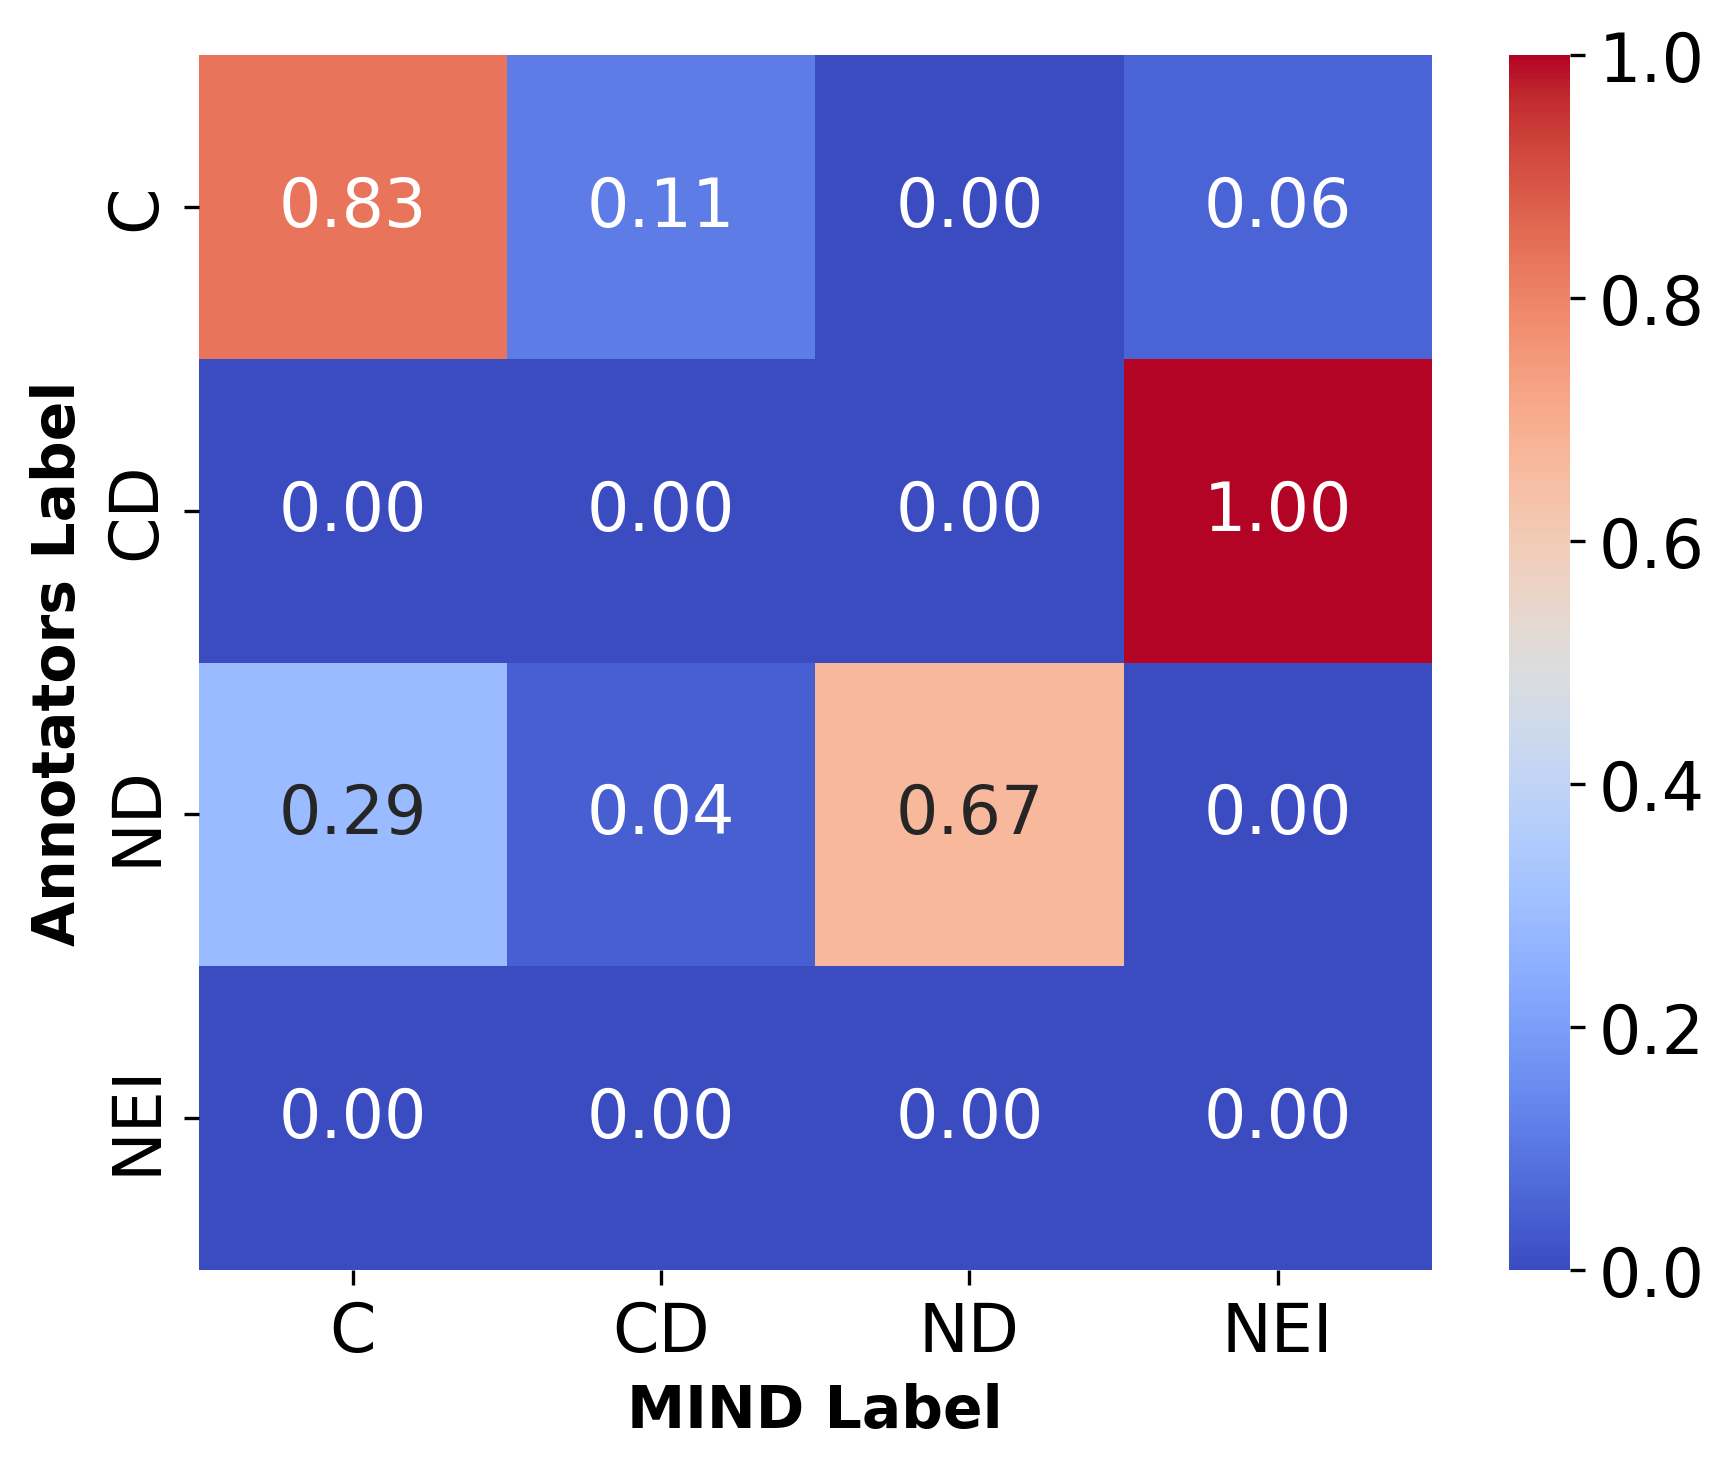

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


df = pd.read_excel("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/climate_fever/excel_eval/final_climate_fever_to_eval (1).xlsx")

df.columns
# keep rows only where 'label ok' has a value
df = df[df['label ok'].notna()]
df[df.label != "NOT_ENOUGH_INFO"]


# if "label ok" is "ok", put as "label ok" the value of "label"
df.loc[df['label ok'] == "ok", 'label ok'] = df['label']
df.loc[df['label ok'] == "ok (but maybe CULTURAL_DISCREPANCY since both passages talk about different events)", 'label ok'] = df['label']
df.loc[df['label ok'] == "DISCREPANCY", 'label ok'] = df['label']
df.loc[df['label ok'] == "NEI (source talks about climate cycle, targed talks about climate change, wich are not considered the as the same thing)", 'label ok'] = "NEI"
df["label ok"].unique()

label_map = {
    "CONTRADICTION": "C",
    "CULTURAL_DISCREPANCY": "CD",
    "NO_DISCREPANCY": "ND",
    "NOT_ENOUGH_INFO": "NEI"
}

# Map both label columns to abbreviations
df['label_true'] = df['label ok'].map(label_map)  # TRUE labels
df['label_pred'] = df['label'].map(label_map)     # PREDICTED labels

# Drop rows where mapping failed (i.e., NaN from unmatched labels)
df_clean = df.dropna(subset=['label_true', 'label_pred'])

# Get mapped values
y_true = df_clean['label_true']
y_pred = df_clean['label_pred']

# Generate normalized confusion matrix (row-wise)
cm = confusion_matrix(y_true, y_pred, labels=list(label_map.values()), normalize='true')

# Plot
plt.figure(figsize=(6, 5), dpi=300)

ax = sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    xticklabels=label_map.values(),
    yticklabels=label_map.values(),
    annot_kws={"size": 16},             # font size for cell numbers
    #cbar_kws={"shrink": 0.8}            # optional: shrink colorbar height
)

# Make colorbar tick labels bigger
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)       # <-- Set this to your desired size

# Titles and axis labels
plt.xlabel("MIND Label", fontsize=14, fontweight="bold")
plt.ylabel("Annotators Label", fontsize=14, fontweight="bold")
plt.tick_params(axis="x", rotation=0, labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.tight_layout()

# Save as PNG (or PDF for vector quality)
plt.savefig("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/figures/confusion_matrix_climate_fever.pdf", dpi=300)
plt.show()


In [27]:
from sklearn.metrics import classification_report

# Generate classification report as dictionary
report = classification_report(df['label ok'], df['label'], output_dict=True)

# Extract F1-scores per class into a DataFrame
f1_per_category = {
    label: metrics['f1-score']
    for label, metrics in report.items()
    if label not in ('accuracy', 'macro avg', 'weighted avg')
}

# Optionally convert to DataFrame
import pandas as pd
f1_df = pd.DataFrame.from_dict(f1_per_category, orient='index', columns=['f1-score'])

print(f1_df)


                      f1-score
CONTRADICTION            0.625
CULTURAL_DISCREPANCY     0.000
NEI                      0.000
NOT_ENOUGH_INFO          0.000
NO_DISCREPANCY           0.800


/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.venv_fever/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.venv_fever/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.venv_fever/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.venv_fever/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.venv_fever/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/.venv_fever/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

                      precision    recall  f1-score    support
CONTRADICTION          0.500000  0.833333  0.625000  18.000000
CULTURAL_DISCREPANCY   0.000000  0.000000  0.000000   1.000000
NEI                    0.000000  0.000000  0.000000   3.000000
NOT_ENOUGH_INFO        0.000000  0.000000  0.000000   0.000000
NO_DISCREPANCY         1.000000  0.666667  0.800000  45.000000
accuracy               0.671642  0.671642  0.671642   0.671642
macro avg              0.300000  0.300000  0.285000  67.000000
weighted avg           0.805970  0.671642  0.705224  67.000000


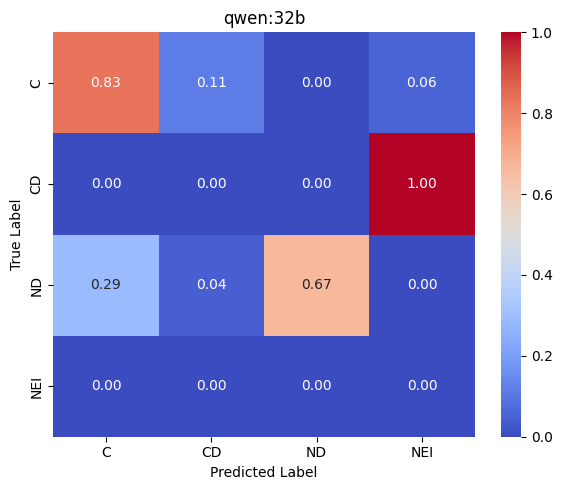

In [26]:
from sklearn.metrics import classification_report

report = classification_report(df['label ok'], df['label'], output_dict=True)

# Extract F1-scores
f1_df = pd.DataFrame(report).transpose()
print(f1_df[['precision', 'recall', 'f1-score', 'support']])


label_map = {
    "CONTRADICTION": "C",
    "CULTURAL_DISCREPANCY": "CD",
    "NO_DISCREPANCY": "ND",
    "NOT_ENOUGH_INFO": "NEI"
}

df['label_true'] = df['label ok'].map(label_map)
df['label_pred'] = df['label'].map(label_map)

# Drop invalid rows
df_clean = df.dropna(subset=['label_true', 'label_pred'])

y_true = df_clean['label_true']
y_pred = df_clean['label_pred']

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=list(label_map.values()), normalize='true')

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.title("qwen:32b")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
